In [58]:
#!http://benalexkeen.com/parallel-coordinates-in-matplotlib/

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

#df = pd.read_csv('Auto.csv')
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')

In [60]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [61]:
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))
df['mpg'] = pd.cut(df['mpg'], [8, 16, 24, 32, 50])

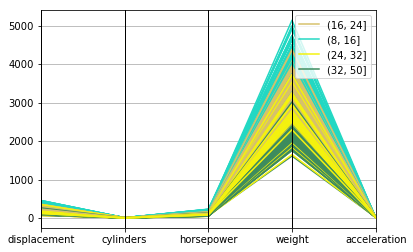

In [62]:
plt.figure()

pd.tools.plotting.parallel_coordinates(
    df[['mpg', 'displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']], 
    'mpg')

plt.show()

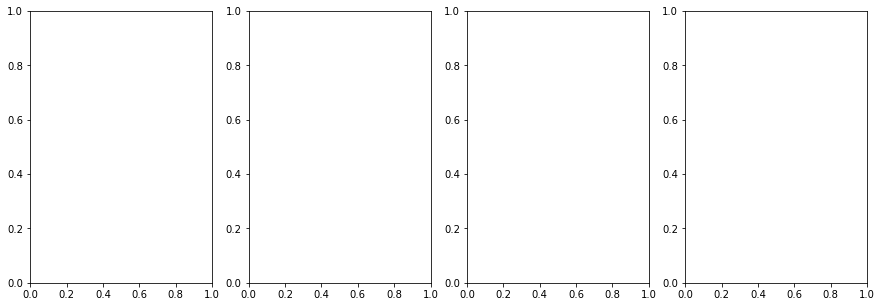

In [63]:
from matplotlib import ticker

cols = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']

# create dict of categories: colours
colours = {df['mpg'].cat.categories[i]: colours[i] for i, _ in enumerate(df['mpg'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

In [64]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,"(16, 24]",8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,"(8, 16]",8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,"(16, 24]",8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,"(8, 16]",8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,"(16, 24]",8,302.0,140.0,3449,10.5,70,1,ford torino
5,"(8, 16]",8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,"(8, 16]",8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,"(8, 16]",8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,"(8, 16]",8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,"(8, 16]",8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [65]:
# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

In [66]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,"(16, 24]",1.0,0.617571,0.456522,0.536150,0.238095,70,1,chevrolet chevelle malibu
1,"(8, 16]",1.0,0.728682,0.646739,0.589736,0.208333,70,1,buick skylark 320
2,"(16, 24]",1.0,0.645995,0.565217,0.516870,0.178571,70,1,plymouth satellite
3,"(8, 16]",1.0,0.609819,0.565217,0.516019,0.238095,70,1,amc rebel sst
4,"(16, 24]",1.0,0.604651,0.510870,0.520556,0.148810,70,1,ford torino
5,"(8, 16]",1.0,0.932817,0.826087,0.773462,0.119048,70,1,ford galaxie 500
6,"(8, 16]",1.0,0.997416,0.945652,0.777148,0.059524,70,1,chevrolet impala
7,"(8, 16]",1.0,0.961240,0.918478,0.765240,0.029762,70,1,plymouth fury iii
8,"(8, 16]",1.0,1.000000,0.972826,0.797278,0.119048,70,1,pontiac catalina
9,"(8, 16]",1.0,0.832041,0.782609,0.634250,0.029762,70,1,amc ambassador dpl


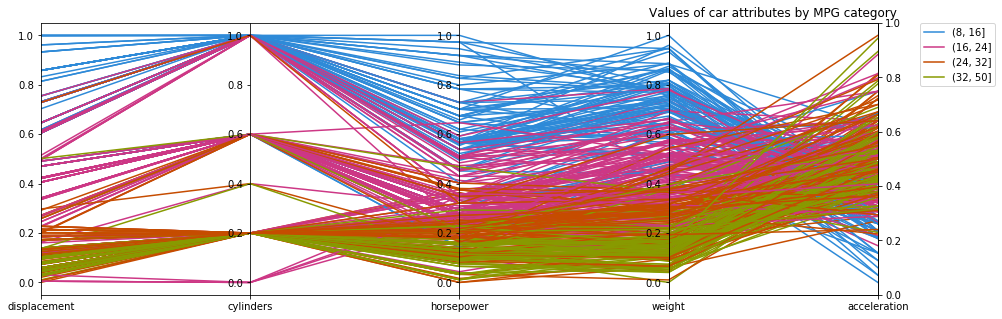

In [73]:
from matplotlib import ticker

cols = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']

# create dict of categories: colours
colours = {df['mpg'].cat.categories[i]: colours[i] for i, _ in enumerate(df['mpg'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))
    
# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, 'mpg']
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['mpg'].cat.categories],
    df['mpg'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of car attributes by MPG category")

plt.show()